### Import Packages

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emf_fxns as emf

### file path to dataset containing cleaned updated results

In [29]:

fp = "~/OneDrive - NREL/EMF-37 - Lamers, Patrick's files/lwachs/"
fname = 'cleaned_emf_data_usa_15mar23.csv'
date = 'apr23'
Output_graphic_directory = date + '/figs/'
Output_file_directory = date + '/files/'


### If you are making the directories for figs and files for the first time, run the following commands:

In [30]:
# os.makedirs(Output_file_directory)
# os.makedirs(Output_graphic_directory)

### Open data file as dataframe

In [31]:
#df = pd.read_csv(fp+"/cleaned_emf_data_national_08dec22.csv", usecols= list(range(1,9)))
df = pd.read_csv(fp+fname, usecols= list(range(1,9)))
# some versions of this dataset contain USA, Canada, and Mexico
df.query('region == "United States"', inplace = True)
df.reset_index(drop = True, inplace = True)

### Compare total energy in the transportation sector across all represented fuel types with bioenergy

#### Create new dataframe containing data with variables that have Biomass OR Biogas in variable string name

In [32]:

df_bio = (df[df['variable'].str.contains('Biomass|Biogas', case=False)])
df_bio.reset_index(drop = True, inplace = True)


#### Limit bioenergy dataframe to only cross-sectoral Final Energy

In [33]:
dfb_fn = df_bio[df_bio['variable'].str.contains('Final Energy|Secondary Energy|Electricity', case=False)][df_bio['unit'].str.contains('EJ/yr', case=False)]
dfb_fn.reset_index(drop = True, inplace = True)
print(dfb_fn.head())
dfb_t = dfb_fn[dfb_fn['variable'].str.contains('transportation', case=False)]
dfb_t.reset_index(drop=True, inplace=True)

   model     scenario         region                      variable   unit  \
0  ADAGE  0by50.CMSG4  United States  Final Energy|Biomass Liquids  EJ/yr   
1  ADAGE  0by50.CMSG4  United States  Final Energy|Biomass Liquids  EJ/yr   
2  ADAGE  0by50.CMSG4  United States  Final Energy|Biomass Liquids  EJ/yr   
3  ADAGE  0by50.CMSG4  United States  Final Energy|Biomass Liquids  EJ/yr   
4  ADAGE  0by50.CMSG4  United States  Final Energy|Biomass Liquids  EJ/yr   

   year     value              datasrc  
0  2010  1.097552  emf37_usacanmex.csv  
1  2015  1.565218  emf37_usacanmex.csv  
2  2020  1.692778  emf37_usacanmex.csv  
3  2025  1.670486  emf37_usacanmex.csv  
4  2030  1.533693  emf37_usacanmex.csv  


/var/folders/72/rhdmnrhx3b11qcff053brwxcwb21pk/T/ipykernel_66599/2615143524.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfb_fn = df_bio[df_bio['variable'].str.contains('Final Energy|Secondary Energy|Electricity', case=False)][df_bio['unit'].str.contains('EJ/yr', case=False)]


#### Define master dataframe variable and pick scenario

In [34]:
df_m = dfb_t
scenario = '0by50.TSG4'


#### Make dataframe for all transportation final energy, regardless of bioenergy inclusion. This dataframe includes only entries with Final Energy|Transportation, so totals for the category. It excludes the entries with further resolution (e.g., Final Energy|Transportation|Passenger')

In [35]:
dft_fn = df[df['variable'] == 'Final Energy|Transportation']
dft_fn.reset_index(drop = True, inplace = True)
dft_fn.head()

,model,scenario,region,variable,unit,year,value,datasrc
0,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2010,27.042563,emf37_usacanmex.csv
1,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2015,27.575625,emf37_usacanmex.csv
2,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2020,27.549509,emf37_usacanmex.csv
3,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2025,25.409074,emf37_usacanmex.csv
4,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2030,23.673793,emf37_usacanmex.csv


#### Pivot dataframe using custom function in order to visualize

In [36]:
data_transport_full = emf.emf(dft_fn, df_m, scenario, 'Final Energy|Transportation', 'x', 'y', 'Transport Full')
data_transport = emf.emf(dfb_t, df_m, scenario, 'Final Energy|Transportation|Biomass Solids', 'Final Energy|Transportation|Biomass Liquids', 'Final Energy|Transportation|Biogas', 'Transportation')

#### Plot Bioenergy in transport final energy over time by model (scenario was selected above)

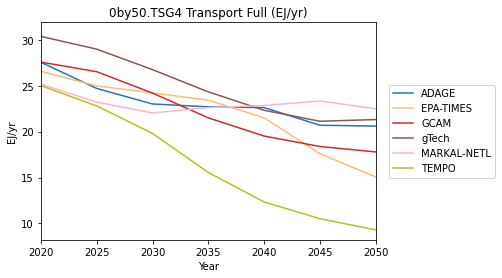

In [37]:
emf.figs(data_transport_full, 'Bioenergy Transport Full', scenario+' Transport Full')
plt.show()

#### Create ratio of bioenergy to total final energy in transportation

In [38]:
data_transport_full['ratio'] = (data_transport['Bioenergy Transportation'] / data_transport_full['Bioenergy Transport Full'])*100
data_transport_full.head()

,model,year,Biomass Solids,Biomass Liquids,Biogas,Bioenergy Transport Full,ratio
0,ADAGE,2010,27.042563,0,0,27.042563,4.058609
1,ADAGE,2015,27.575625,0,0,27.575625,5.676093
2,ADAGE,2020,27.549509,0,0,27.549509,6.144494
3,ADAGE,2025,24.702422,0,0,24.702422,6.404694
4,ADAGE,2030,23.012186,0,0,23.012186,6.323240


#### Plot bioenergy as a percentage of total final energy in transportation

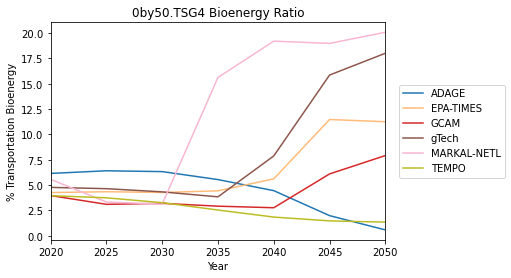

In [39]:
emf.figs(data_transport_full, 'ratio', scenario)
plt.savefig(Output_graphic_directory + scenario + '_ratio.png', bbox_inches='tight', dpi=300)
plt.show()

In [40]:
data_transport_full.to_excel('Exported spreadsheets/data_transport_full.xlsx')

# Now we need to include other fuel types within transportation sector.

Variables -> after we go through this we'll re-write the first function to include more variables
Final Energy|Transportation|Bioenergy variables
" Electricity
" Gas
" Hydrogen
" Oil -> contains diesel gasoline and jet fuel
" Synthetic Gas
" Synthetic 
(Note that this differs from the dft_fn dataframe, which includes only Final Energy|Transportation).

Build dataframe

In [41]:
# This dataframe includes all entries with Transportation and final energy
dft = df[df['variable'].str.contains('Transportation', case = False)].loc[df['unit'] == 'EJ/yr']
dft = dft[dft['variable'].str.contains('Final Energy', case = False)]
dft.reset_index(drop = True, inplace = True)

dft.head()
# [v for v in df['variable'] if 'Transportation' in v and 'EJ/yr' in df['unit']]


,model,scenario,region,variable,unit,year,value,datasrc
0,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2010,27.042563,emf37_usacanmex.csv
1,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2015,27.575625,emf37_usacanmex.csv
2,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2020,27.549509,emf37_usacanmex.csv
3,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2025,25.409074,emf37_usacanmex.csv
4,ADAGE,0by50.CMSG4,United States,Final Energy|Transportation,EJ/yr,2030,23.673793,emf37_usacanmex.csv


### Pivot dataframe by model, scenario and year

In [42]:
Reshaped_dft = dft.pivot(index = ['model', 'scenario', 'year'], columns = 'variable', values = 'value')

### Create pivoted dataframe limited to just bioenergy variables

In [43]:
dft_bio = Reshaped_dft.filter(regex = 'Bio')
dft_bio = dft_bio.dropna(axis = 0, how = 'all')
dft_bio['Final Energy|Transportation|Freight and Passenger|Aviation|Biomass Liquids'] = dft_bio['Final Energy|Transportation|Freight|Aviation|Biomass Liquids'] + dft_bio['Final Energy|Transportation|Passenger|Aviation|Biomass Liquids']
dft_bio.index.unique(level = 'model')

Index(['ADAGE', 'AnyMOD', 'EC-MSMR', 'EPA-TIMES', 'EPS', 'FECM-NEMS', 'GCAM',
       'GCAM-USA', 'MA3T', 'MARKAL-NETL', 'NATEM', 'TEMOA', 'TEMPO',
       'US-REGEN', 'gTech'],
      dtype='object', name='model')

### Aviation fuels are of interest
#### Create sum of the two aviation fuel biomass categories. Note that dft_Aviation is limited to final energy|transportation and biomass

In [44]:
dft_Aviation = pd.DataFrame(dft_bio.stack(level = 0))
dft_Aviation.reset_index(inplace = True)
dft_Aviation = dft_Aviation[dft_Aviation['variable'] == 'Final Energy|Transportation|Freight and Passenger|Aviation|Biomass Liquids']
dft_Aviation['model'].unique()

array(['EPS', 'NATEM', 'TEMPO'], dtype=object)

Only three models show the use of biofuels for aviation separately: EPS, NATEM and TEMPO                                                                                             

## Create heatmap to show use of biofuels (only biomass liquids are shown) in aviation in all scenarios and models

#### Note that the same series of commands can create a heatmap for use of biofuels in any of the subsectors.

<AxesSubplot:xlabel='year', ylabel='model-scenario'>

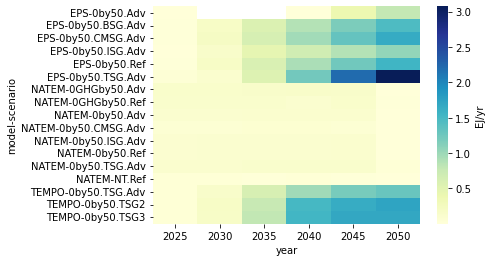

In [45]:
Av_pivot = dft_Aviation.pivot(index = ['model', 'scenario'], columns = 'year', values = 0)
Av_pivot.dropna()
Av_pivot = Av_pivot.replace(0, np.nan).dropna(axis = 1, how = 'all')
poss_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
Av_pivot = Av_pivot[Av_pivot.columns.intersection(poss_years)]
sns.heatmap(Av_pivot, cmap = "YlGnBu", cbar_kws={'label': 'EJ/yr'})

## Create heatmaps to show use of biofuels for each variable in transportation final energy (so each sector, e.g. aviation, rail, etc.)
#### This saves all the heatmaps as png files

In [46]:
vars_to_run = dft_bio.columns.tolist()
[emf.heatmap_for_var(dft_bio, item, Output_graphic_directory) for item in vars_to_run]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 432x288 with 0 Axes>

### The heatmap_for_var function makes a heatmap showing how every model and scenario uses the particular variable (in this case we look at biogas and next all biomass). The figure is large, so the size can be manipulated by the figsize command. It may not show all the  The heatmap is saved to file. 

In [47]:
dft_bio = emf.elim_nan(dft_bio)
dft_bio['Final Energy|Transportation|All Biomass'] = dft_bio['Final Energy|Transportation|Biomass Liquids'] + dft_bio['Final Energy|Transportation|Biogas']

dft_bio['Final Energy|Transportation|Freight and Passenger|Aviation|Biomass Liquids'] = dft_bio['Final Energy|Transportation|Freight|Aviation|Biomass Liquids'] + dft_bio['Final Energy|Transportation|Passenger|Aviation|Biomass Liquids']
plt.figure(figsize = (16,20))
emf.heatmap_for_var(dft_bio, 'Final Energy|Transportation|Biogas', Output_graphic_directory)

<Figure size 1152x1440 with 0 Axes>

In [48]:
plt.figure(figsize = (16,20))
emf.heatmap_for_var(dft_bio, 'Final Energy|Transportation|All Biomass', Output_graphic_directory)

<Figure size 1152x1440 with 0 Axes>

### Make a heatmap for all biomass use in transport over time
#### The function makes a single heat map for a single scenario e.g., NT.Ref, showing all models that include the given scenario. The heatmap is saved to a file. Then we place the heatmap function in a for loop to create a heatmap for each scenario. Each heatmap is saved to a file.

In [49]:
emf.heatmap_for_scen(dft_bio, 'NT.Ref', Output_graphic_directory)
scens_to_run = emf.find_elements(dft_bio)
[emf.heatmap_for_scen(dft_bio, item, Output_graphic_directory) for item in scens_to_run]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 432x288 with 0 Axes>

### Just as for bioenergy, make dataframes for other alternatives to fossil fuels

In [50]:
dft_hydro = Reshaped_dft.filter(regex = 'Hydro')
dft_hydro = dft_hydro.dropna(axis = 0, how = 'all')
dft_elect = Reshaped_dft.filter(regex = 'Elect')
dft_elect = dft_elect.dropna(axis = 0, how = 'all')

### Make heatmaps showing the use of hydrogen in all models; makes a single heatmap per scenario, for all the scenarios that use hydrogen in transportation. Saves them to a file

In [51]:
scen_list = emf.find_elements(dft_hydro, 'Final Energy|Transportation|Hydrogen')
[emf.heatmap_for_scen(dft_hydro, item, Output_graphic_directory, 'Final Energy|Transportation|Hydrogen') for item in scen_list]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

<Figure size 432x288 with 0 Axes>

### Make a heatmap showing the use of synthetic fuels for transportation in all models and scenarios.

In [52]:
dft_syn = Reshaped_dft.filter(regex = 'Synthetic')
dft_syn = dft_syn.dropna(axis = 0, how = 'all')
dft_syn = emf.elim_nan(dft_syn)
dft_syn['Final Energy|Transportation|All Synthetic'] = dft_syn['Final Energy|Transportation|Synthetic Liquids'] + dft_syn['Final Energy|Transportation|Synthetic Gas']
emf.heatmap_for_var(dft_syn, 'Final Energy|Transportation|All Synthetic', Output_graphic_directory)

<Figure size 432x288 with 0 Axes>

# Clustered bar charts
##### Note that this works best for scenarios without too many models. So NT.Ref is hard to read.

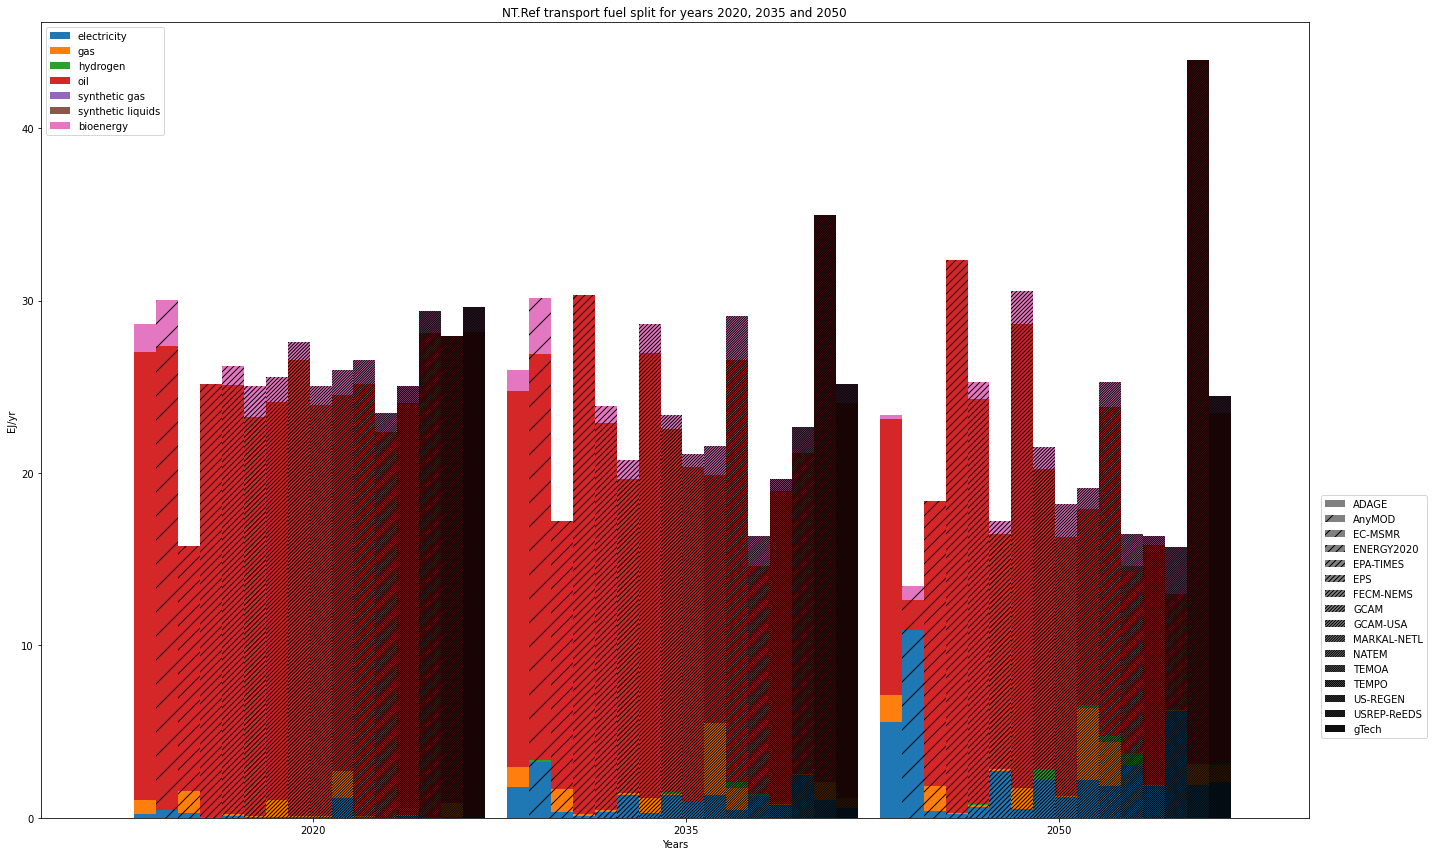

In [53]:
df_to_plot = emf.prep_df_for_bar_chart(Reshaped_dft, 'NT.Ref')
df_to_plot = df_to_plot.drop(['biogas', 'biomass liquids'], axis = 1)
problematic_models = ['EIA_Historic', 'AEO2020', 'AEO2021', 'AEO2022', 'MER']
df_to_plot = df_to_plot[~df_to_plot['model'].isin(problematic_models)]
df_to_plot = df_to_plot.drop(['scenario'], axis = 1)
emf.plot_clustered_stacked(df_to_plot, 'NT.Ref')

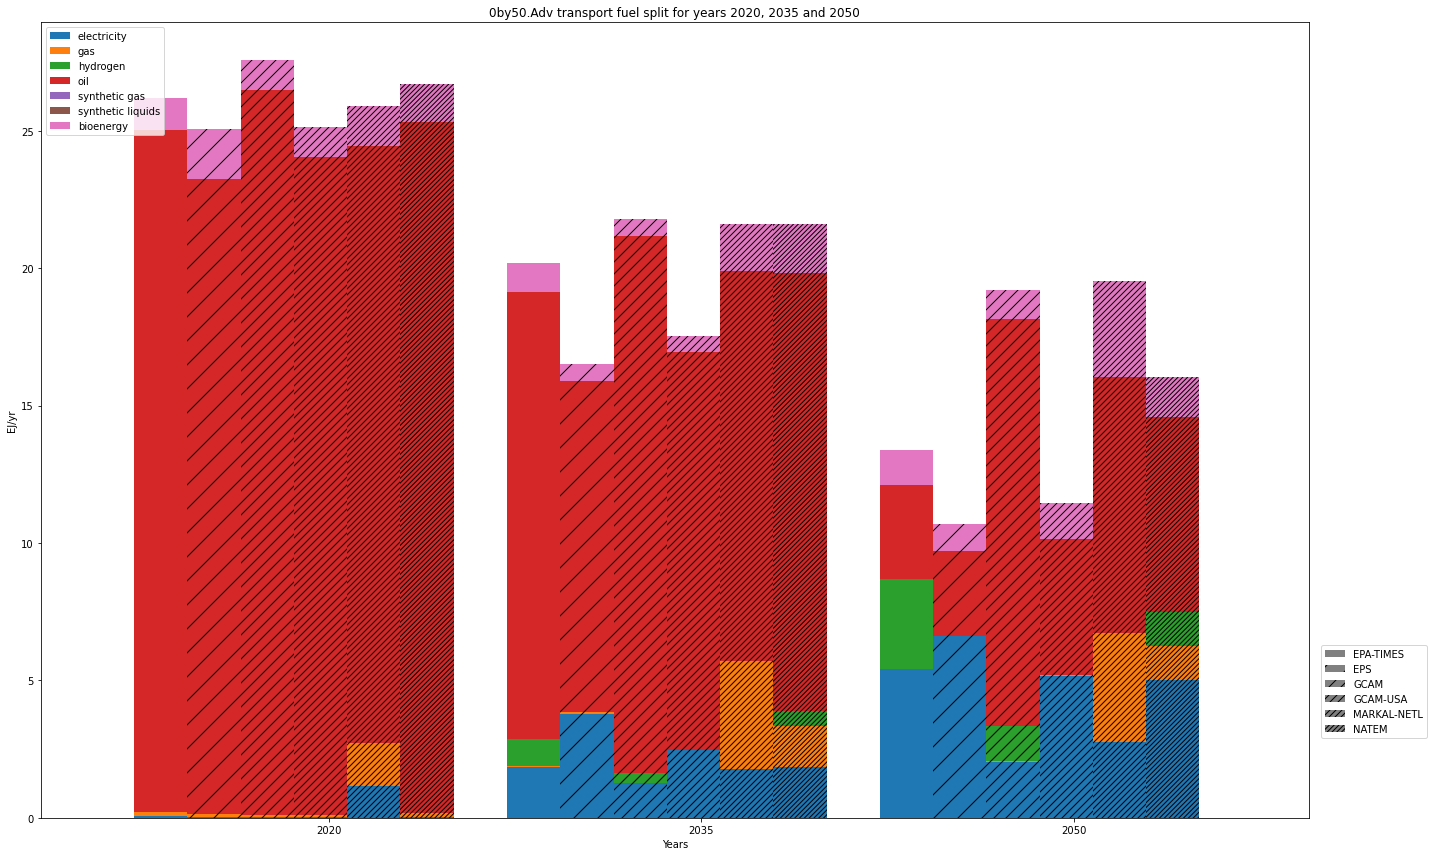

In [54]:
df_to_plot = emf.prep_df_for_bar_chart(Reshaped_dft, '0by50.Adv')
df_to_plot = df_to_plot.drop(['biogas', 'biomass liquids'], axis = 1)
df_to_plot = df_to_plot[~df_to_plot['model'].isin(problematic_models)]
df_to_plot = df_to_plot.drop(['scenario'], axis = 1)
emf.plot_clustered_stacked(df_to_plot, '0by50.Adv')